# Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file_1 = "data/city_data.csv"
file_2 = "data/ride_data.csv"

In [3]:
# Read the City Data
city_df = pd.read_csv(file_1)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the Ride Data
ride_df = pd.read_csv(file_2)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how='outer', on= 'city')
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

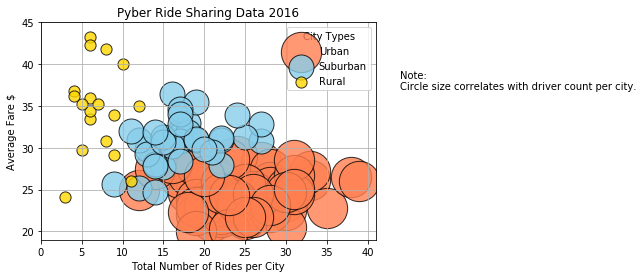

In [6]:
#Create type of region DataFrame
urban = combined_df.loc[combined_df['type'] == 'Urban']
suburban = combined_df.loc[combined_df['type'] == 'Suburban']
rural = combined_df.loc[combined_df['type'] == 'Rural']

# Obtain the x and y coordinates for each of the three city types
x_urban = urban.groupby('city')['ride_id'].count()
y_urban = urban.groupby('city')['fare'].mean()

x_suburban = suburban.groupby('city')['ride_id'].count()
y_suburban = suburban.groupby('city')['fare'].mean()

x_rural = rural.groupby('city')['ride_id'].count()
y_rural = rural.groupby('city')['fare'].mean()

driver_ur = urban.groupby('city')['driver_count'].count().sum()
driver_sub = suburban.groupby('city')['driver_count'].count().sum()
driver_ru = rural.groupby('city')['driver_count'].count().sum()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=driver_ur, marker="o", facecolors="coral", edgecolors="black",alpha = .80)
plt.scatter(x_suburban, y_suburban, s=driver_sub, marker="o", facecolors="skyblue", edgecolors="black", alpha = 0.80)
plt.scatter(x_rural, y_rural, s=driver_ru, marker="o", facecolors="gold", edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare $")
plt.grid(axis='both')
plt.ylim(19, 45)
plt.xlim(0, 41)
# Create a legend
plt.legend(['Urban', 'Suburban','Rural'], title = 'City Types', loc = "best")

# Incorporate a text label regarding circle size
plt.text(44, 37, "Note: \n" "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("C:\\Users\\Nestor\\Desktop\\Bootcamp\\Classes\\Week 5 - Matplotlib\\Homework\\pyber\\RideSharingData.png")

In [7]:
# Show plot
plt.show()

The graph shows the relationship between the areas and prices.
Urban areas have in average lower prices due too the larger number of rides in that kind of area. The opposite of this are the rural areas, they have less number if trips with expensive prices. You can see demand and supply at is finest.

# Total Fares by City Type

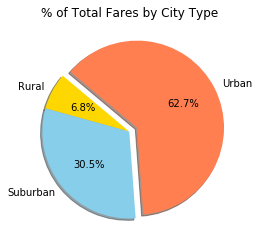

In [8]:
types =  combined_df.groupby('type')
# Calculate Type Percents
total = types['fare'].sum()
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(total, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("C:\\Users\\Nestor\\Desktop\\Bootcamp\\Classes\\Week 5 - Matplotlib\\Homework\\pyber\\Total Fares.png")

Urban rides are the  most demanded; they cover more than 62% of the city types, suburban areas has 30%, finally rural area has 7%.

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

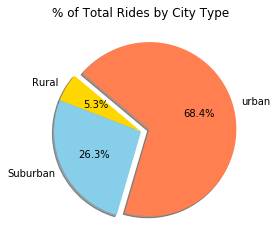

In [10]:
# Calculate Ride Percents
total = types['ride_id'].count()
labels = ['Rural','Suburban','urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(total, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("C:\\Users\\Nestor\\Desktop\\Bootcamp\\Classes\\Week 5 - Matplotlib\\Homework\\pyber\\Total Rides.png")

The total number of rides by city has the same tendency, urban areas have most of the rides, it has 68%.

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

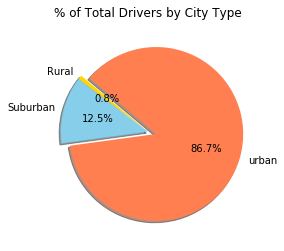

In [12]:
# Calculate Driver Percents
total = types['driver_count'].sum()
labels = ['Rural','Suburban','urban']
colors = ['gold', 'skyblue', 'coral']
explode = [0, 0, 0.1]
# Build Pie Charts
plt.pie(total, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("C:\\Users\\Nestor\\Desktop\\Bootcamp\\Classes\\Week 5 - Matplotlib\\Homework\\pyber\\Total Drivers.png")

The number of driders in urban areas is 86%, meaning a higher competition in that area. 

In [13]:
# Show Figure
plt.show()